**Project includes following components:**


*   Data pre processing
*   Exploratory data analysis and its conclusions
*   Model training to predict whether a person is eligible for loan or not
*   Results and comparision of various algorithms



In [ ]:
#importing reqd. libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**#STARTING WITH WORKING ON DATA AND GET TO KNOW ABOUT IT**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#checking for nulls
data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Imputation for numerical features
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

# Imputation for categorical features
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [ ]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**#LETS DO SOME EDA ON THE DATASET**

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


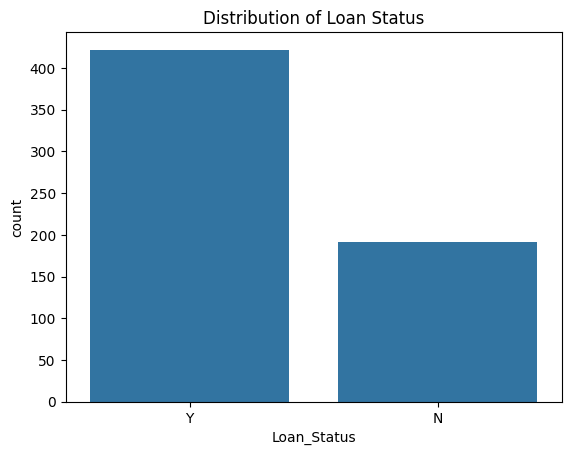

In [ ]:
# Distribution of target variable (Loan_Status)
sns.countplot(x='Loan_Status', data=data)
plt.title('Distribution of Loan Status')
plt.show()

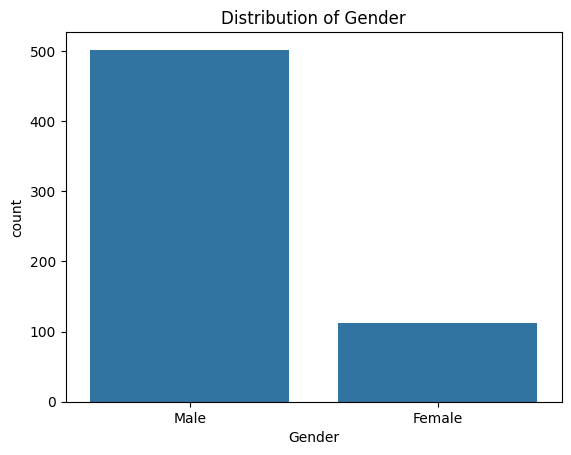

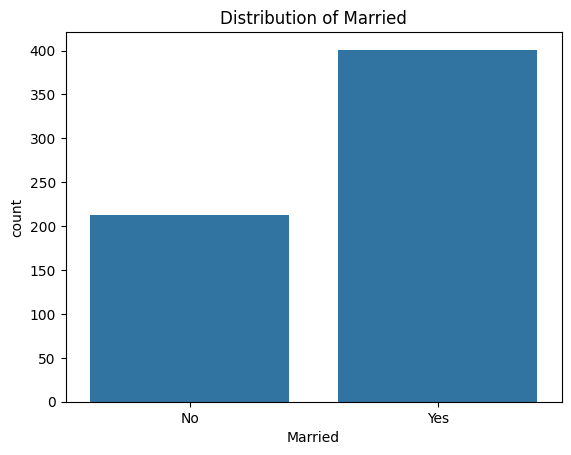

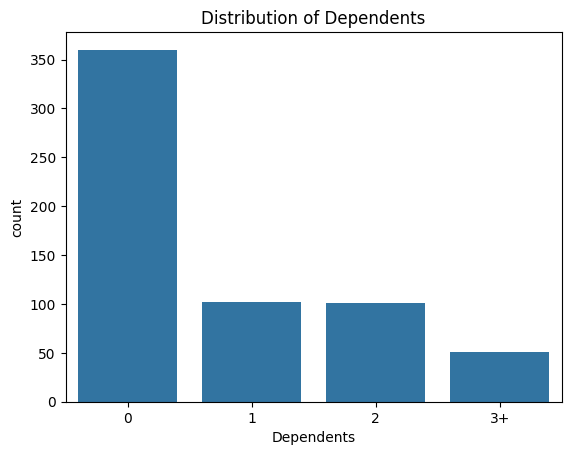

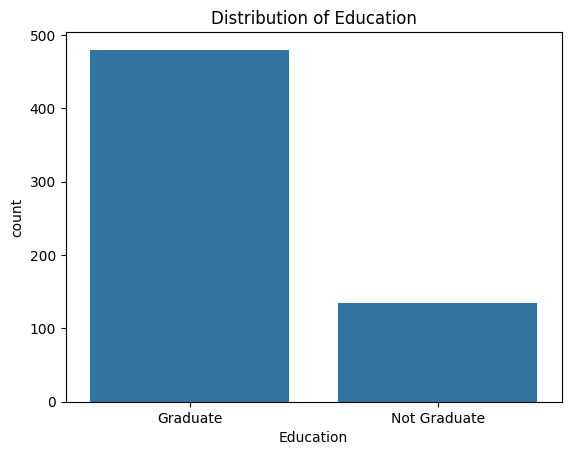

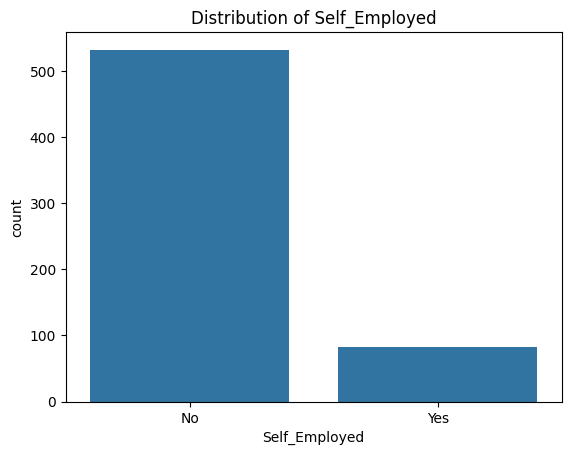

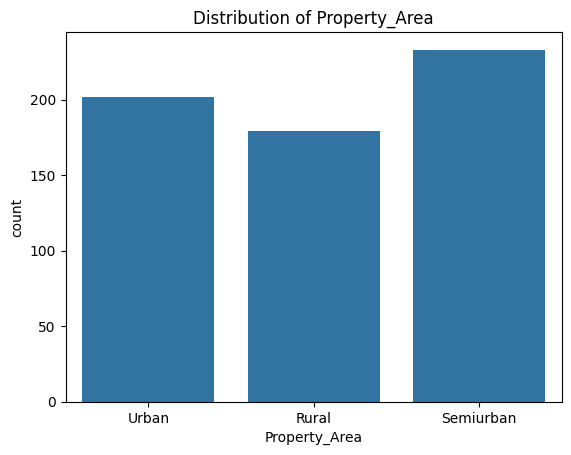

In [ ]:
# Distribution of categorical variables
cat_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for var in cat_vars:
    sns.countplot(x=var, data=data)
    plt.title(f'Distribution of {var}')
    plt.show()

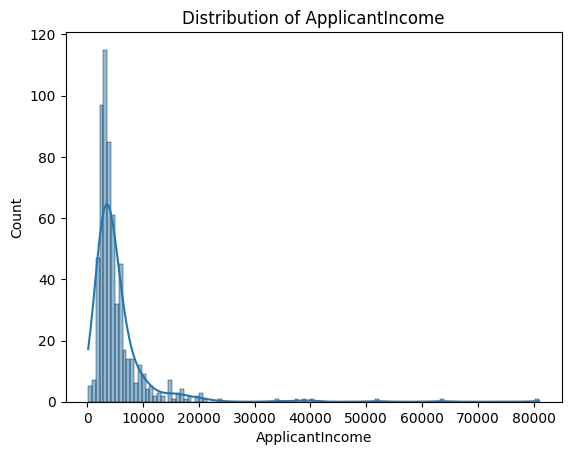

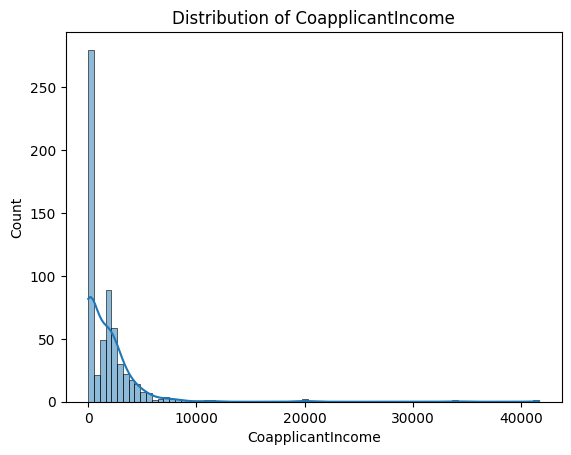

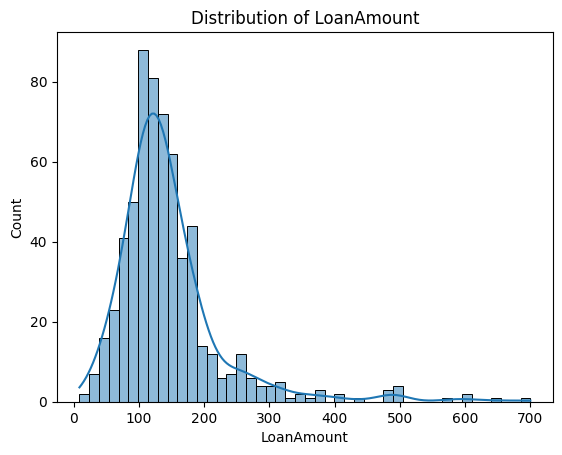

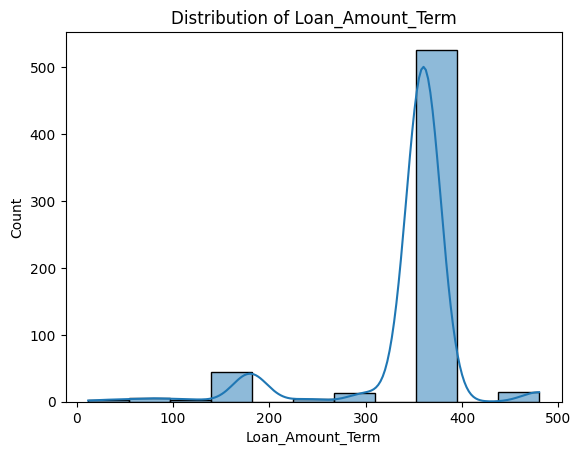

In [ ]:
# Distribution of numerical variables
num_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for var in num_vars:
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

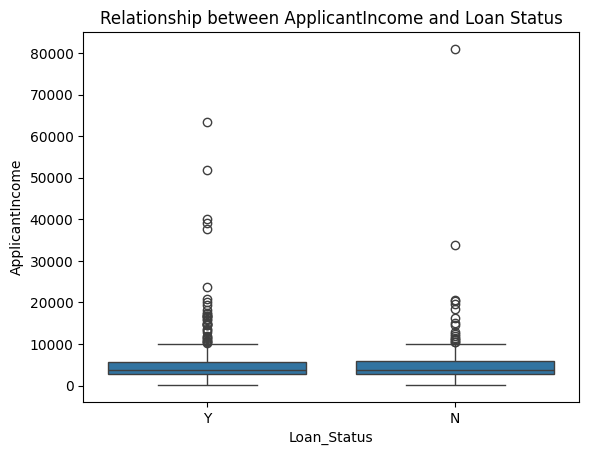

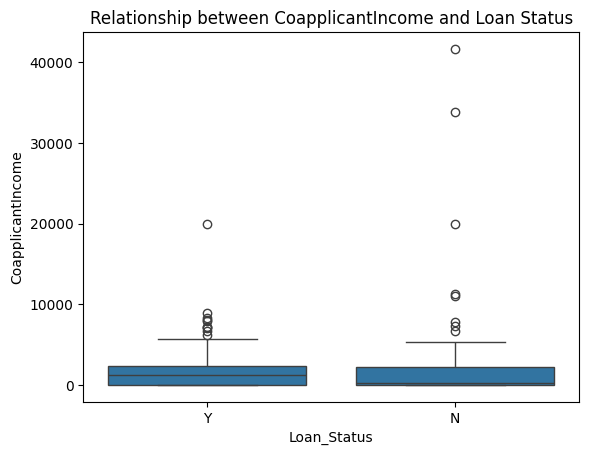

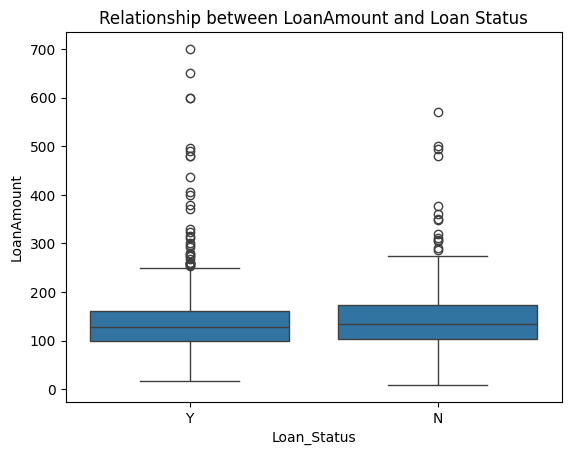

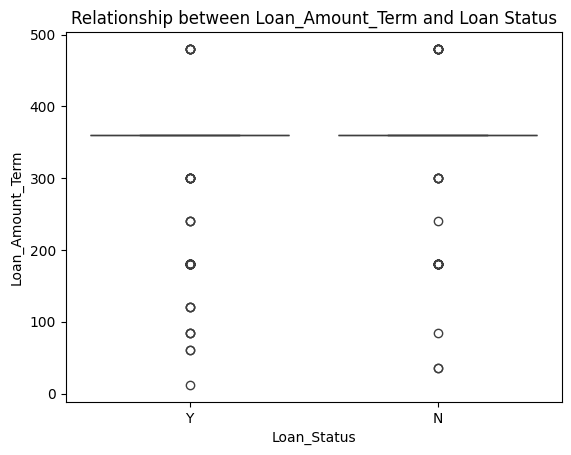

In [ ]:
# Relationship between numerical variables and target variable
for var in num_vars:
    sns.boxplot(x='Loan_Status', y=var, data=data)
    plt.title(f'Relationship between {var} and Loan Status')
    plt.show()

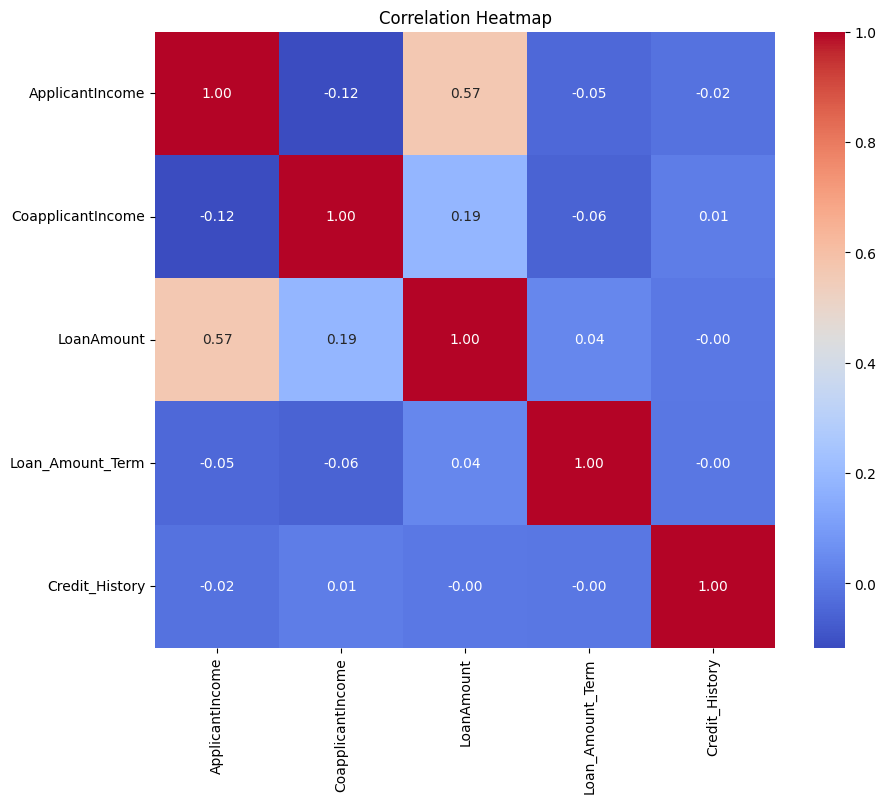

In [ ]:
# Drop non-numeric columns
numeric_df = data.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

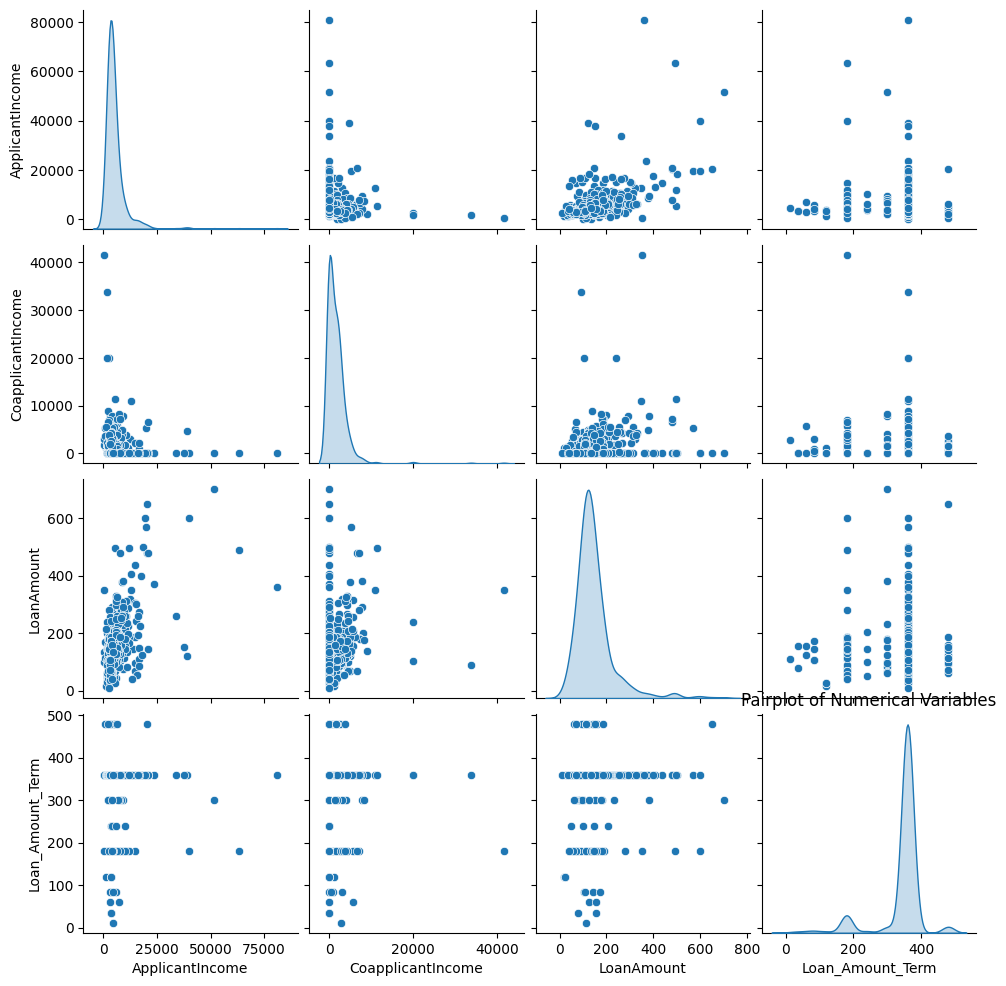

In [ ]:
# Pairplot for numerical variables
sns.pairplot(data[num_vars], diag_kind='kde')
plt.title('Pairplot of Numerical Variables')
plt.show()

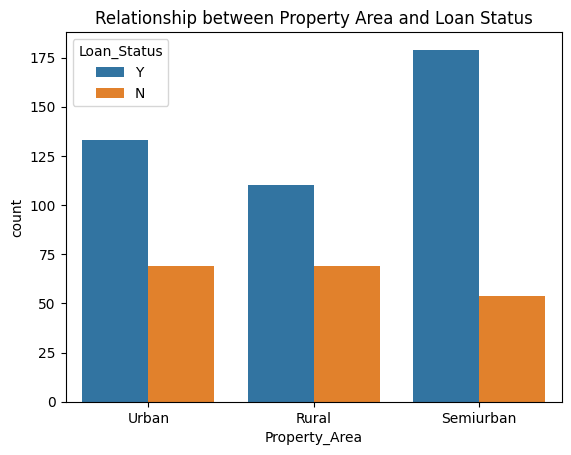

In [ ]:
# Barplot for Property_Area and Loan_Status
sns.countplot(x='Property_Area', hue='Loan_Status', data=data)
plt.title('Relationship between Property Area and Loan Status')
plt.show()

**CONCLUSIONS:**


1.   Majority of people have still uncleared loan status
2.   Among categories: Male gender, Married people have high loan rate.
3.   Semi urban have highest and lowest loan takers, whereas urban and rural have almost similar stats.
4.   According to correlation matrix:

*   Applicant Income and Loan Amount: Moderate positive correlation (0.57). Higher applicant income tends to correlate with larger loan amounts.
*   Coapplicant Income and Loan Amount: Weak positive correlation (0.19). Some association between coapplicant income and loan amount, but not as strong as with applicant income.
*   Loan Amount and Loan Amount Term: Very weak positive correlation (0.04). Slight tendency for longer loan terms to be associated with larger loan amounts.
*   Credit History: No meaningful correlation with other variables.






**#WE'LL START MODELLING NOW**

(we will try some unsupervised and supervised models and compare their results)


In [ ]:
#dropping redundant column
data = data.drop(columns="Loan_ID")

In [ ]:
# Separate target variable (Loan_Status) from predictor variables
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

In [ ]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [ ]:
# Perform encoding for categorical variables
X_encoded = X.copy()  # Create a copy of X to avoid modifying the original DataFrame

X_encoded['Gender'] = X_encoded['Gender'].map({'Male': 1, 'Female': 0})
X_encoded['Married'] = X_encoded['Married'].map({'Yes': 1, 'No': 0})
X_encoded['Education'] = X_encoded['Education'].map({'Graduate': 1, 'Not Graduate': 0})
X_encoded['Self_Employed'] = X_encoded['Self_Employed'].map({'Yes': 1, 'No': 0})
X_encoded = pd.get_dummies(X_encoded, columns=['Property_Area'], drop_first=True)

# Convert boolean columns to integers
X_encoded['Credit_History'] = X_encoded['Credit_History'].astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
labelencoder_y = LabelEncoder()

# Encode the target variable y_train
y_encoded = labelencoder_y.fit_transform(y)

# Print the encoded values
print(y_encoded.shape)

(614,)


In [ ]:
X_encoded.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1,False,True
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1,False,False
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1,False,True
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1,False,True
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1,False,True


In [ ]:
# Preprocess 'Dependents' column
X_encoded['Dependents'] = X_encoded['Dependents'].str.rstrip('+').astype(int)

TRAINING SUPERVISED MODELS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.7886
Random Forest Accuracy: 0.7805
Gradient Boosting Accuracy: 0.7642


TRAINING UNSUPERVISED MODELS

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_encoded, y_encoded)

SVC(kernel='linear', random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of SVM is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of SVM is:  0.7945945945945946


In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of KNN is:  0.5621621621621622


**RESULTS BY EACH ALGORITHM:**


*   Logistic Regression Accuracy: 0.7886
*   Random Forest Accuracy: 0.7805
*   Gradient Boosting Accuracy: 0.7642
*   SVM Accuracy:  0.7945945945945946
*   KNN Accuracy:  0.5621621621621622











